# Classification Exploration

## Imports and functions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def load_and_split_data(file_path, test_size=0.25, random_state=0):
    dataset = pd.read_csv(file_path)
    X = dataset.iloc[:, 1:-1].values  # Exclude 'Sample code number' and 'Class'
    y = dataset.iloc[:, -1].values
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return model, cm, accuracy, y_pred

def plot_confusion_matrix(cm, class_names, model_name):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    if not os.path.exists('outputs'):
        os.makedirs('outputs')
    plt.savefig(f'outputs/{model_name.lower().replace(" ", "_")}_confusion_matrix.png')
    
    plt.show()

def create_and_evaluate_model(model_func, model_name, X_train, X_test, y_train, y_test):
    model = model_func()
    model, cm, accuracy, y_pred = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
    
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    plot_confusion_matrix(cm, ['Benign', 'Malignant'], model_name)
    
    return model, accuracy

def create_logistic_regression_model():
    return make_pipeline(StandardScaler(), LogisticRegression(random_state=0))

def create_knn_model():
    return make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))

def create_svm_model():
    return make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=0))

def create_kernel_svm_model():
    return make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=0))

def create_naive_bayes_model():
    return make_pipeline(StandardScaler(), GaussianNB())

def create_decision_tree_model():
    return make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='entropy', random_state=0))

def create_random_forest_model():
    return make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0))

## Data splitting, model training and plotting

Logistic Regression Results:
Accuracy: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.96      0.96       107
           4       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



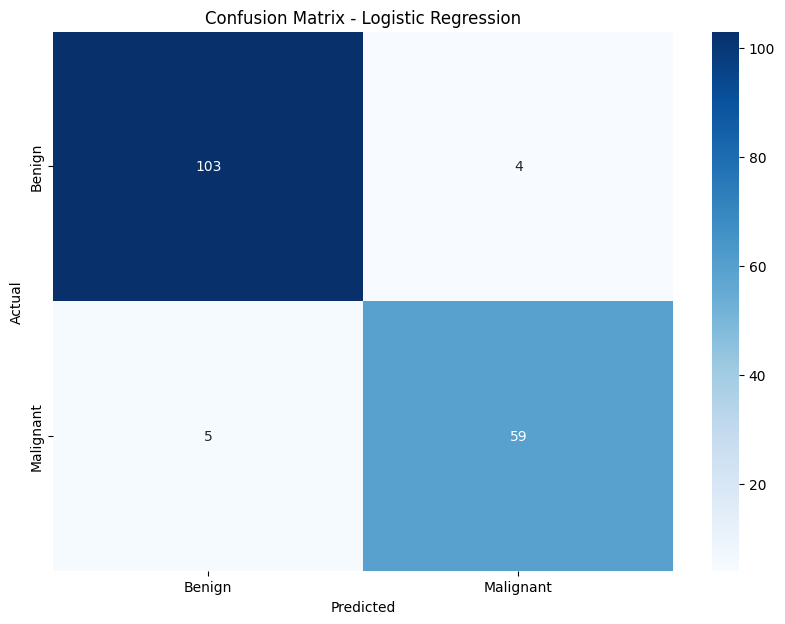

K-Nearest Neighbors Results:
Accuracy: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.96      0.96       107
           4       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



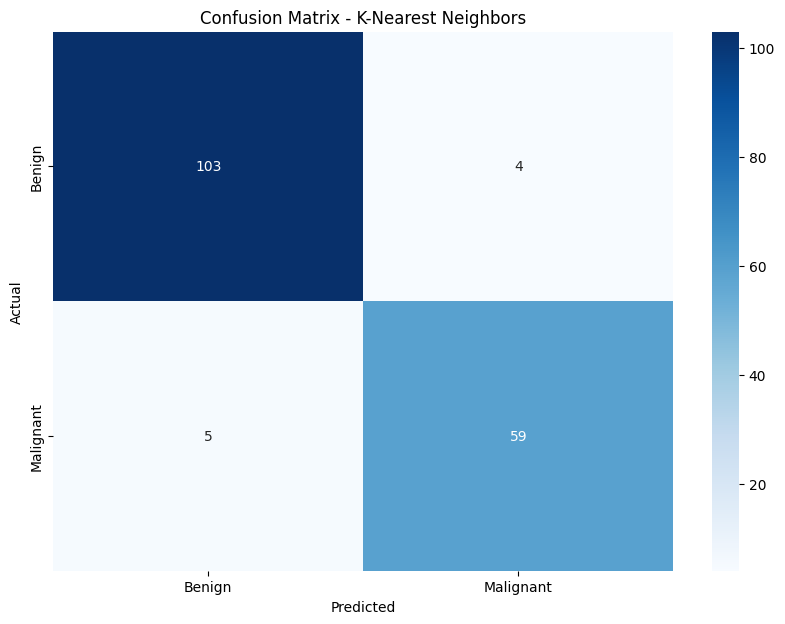

Support Vector Machine Results:
Accuracy: 0.9415204678362573

Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.95      0.95       107
           4       0.92      0.92      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



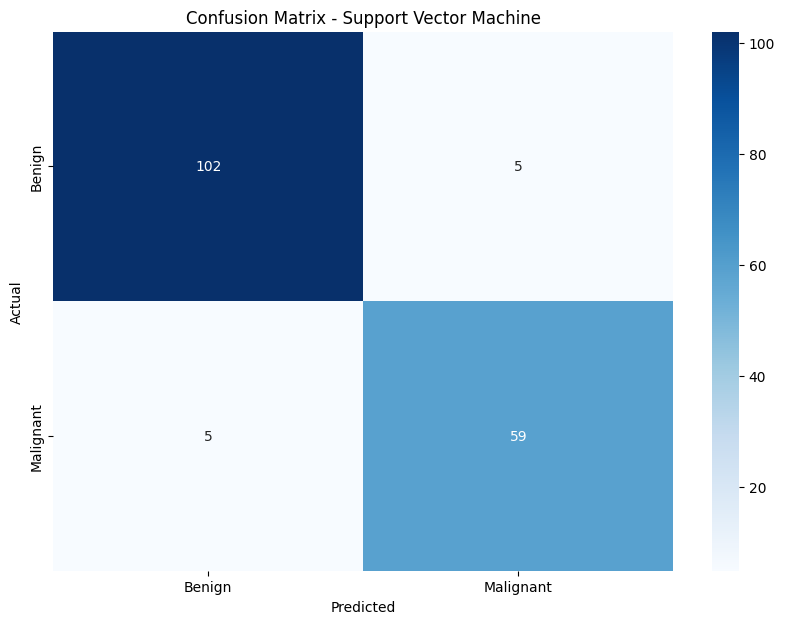

Kernel SVM Results:
Accuracy: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.94      0.96       107
           4       0.91      0.95      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



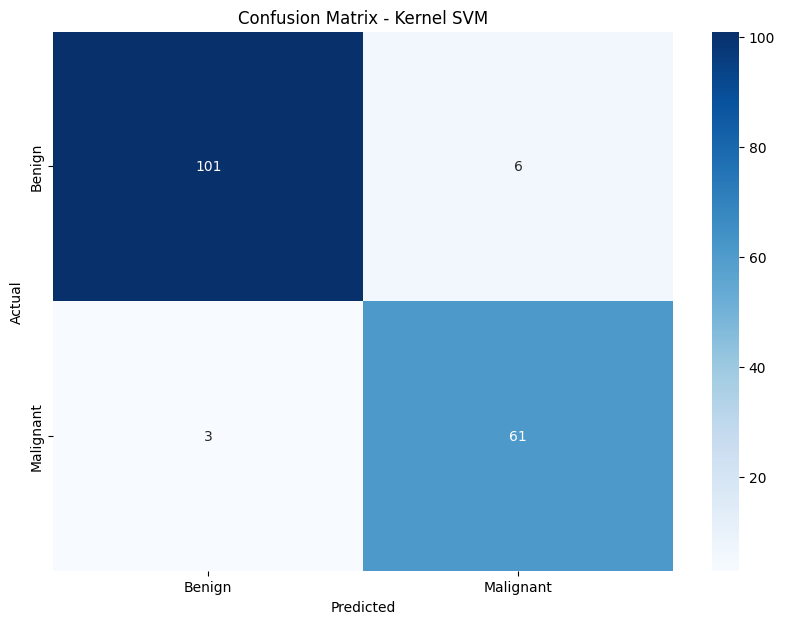

Naive Bayes Results:
Accuracy: 0.9415204678362573

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.93      0.95       107
           4       0.89      0.97      0.93        64

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.94      0.94      0.94       171



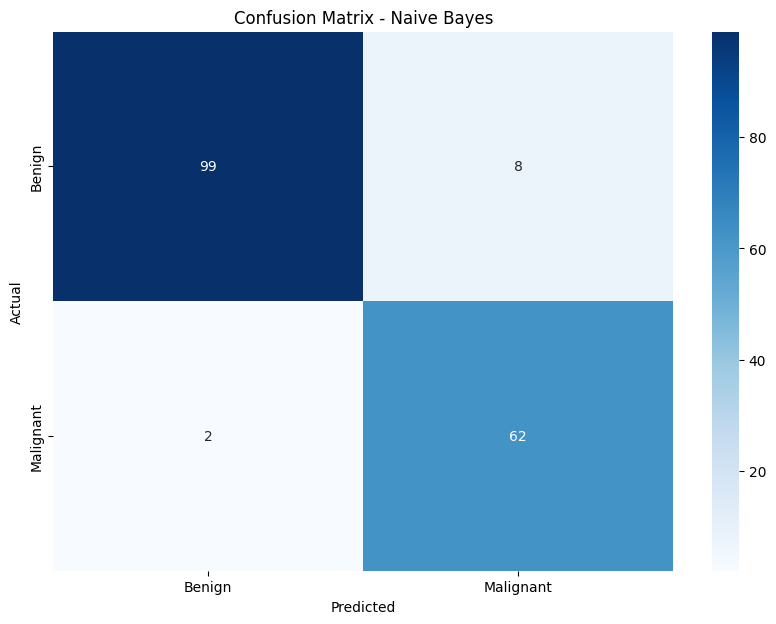

Decision Tree Results:
Accuracy: 0.9590643274853801

Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.97      0.97       107
           4       0.95      0.94      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



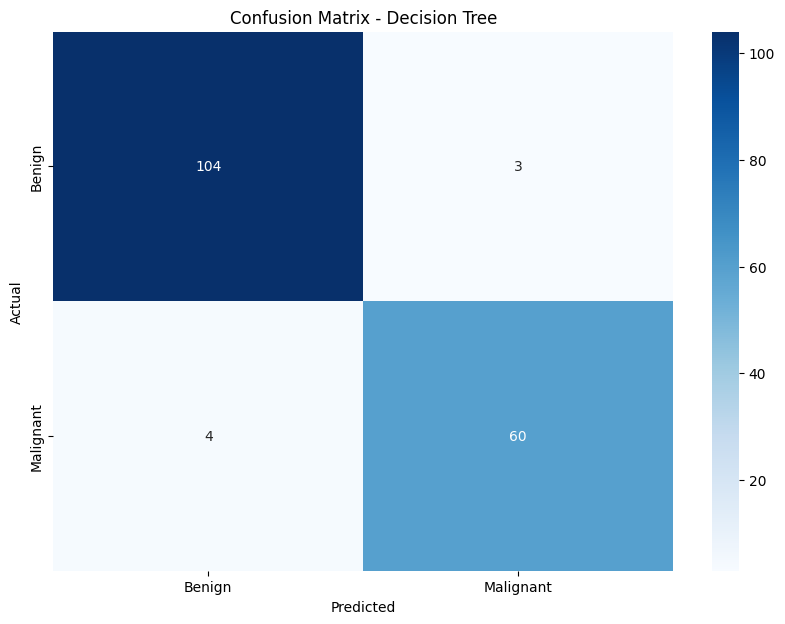

Random Forest Results:
Accuracy: 0.9532163742690059

Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96       107
           4       0.95      0.92      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



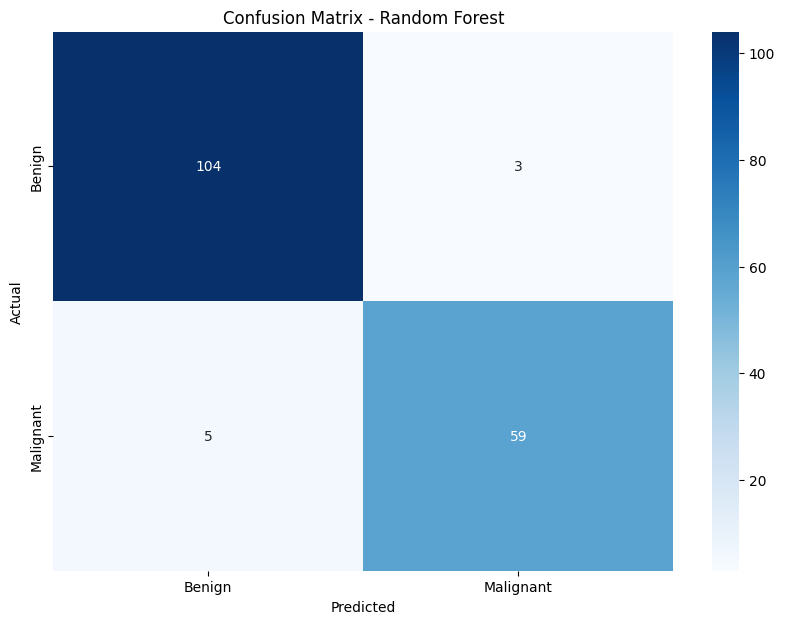

In [6]:
# Load and split the data
X_train, X_test, y_train, y_test = load_and_split_data('raw_data/Data.csv')

# List of models to evaluate
models = [
    (create_logistic_regression_model, "Logistic Regression"),
    (create_knn_model, "K-Nearest Neighbors"),
    (create_svm_model, "Support Vector Machine"),
    (create_kernel_svm_model, "Kernel SVM"),
    (create_naive_bayes_model, "Naive Bayes"),
    (create_decision_tree_model, "Decision Tree"),
    (create_random_forest_model, "Random Forest")
]

# Evaluate all models
results = {}
for model_func, model_name in models:
    model, accuracy = create_and_evaluate_model(model_func, model_name, X_train, X_test, y_train, y_test)
    results[model_name] = accuracy

## AutoGluon

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Mar 29 23:14:13 UTC 2024
CPU Count:          12
Memory Avail:       5.29 GB / 7.66 GB (69.0%)
Disk Space Avail:   833.65 GB / 1006.85 GB (82.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will

Training AutoGluon model...


	0.9709	 = Validation score   (accuracy)
	0.19s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.9709	 = Validation score   (accuracy)
	0.24s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9709	 = Validation score   (accuracy)
	0.7s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9709	 = Validation score   (accuracy)
	0.63s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	0.9709	 = Validation score   (accuracy)
	0.22s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9709	 = Validation score   (accuracy)
	0.62s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9709	 = Validation score   (accuracy)
	0.62s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
No improvement since epoch 3: early stopping
	0.9709	 = Validation score   (accu

AutoGluon Results:
Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.96      0.96       107
           4       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



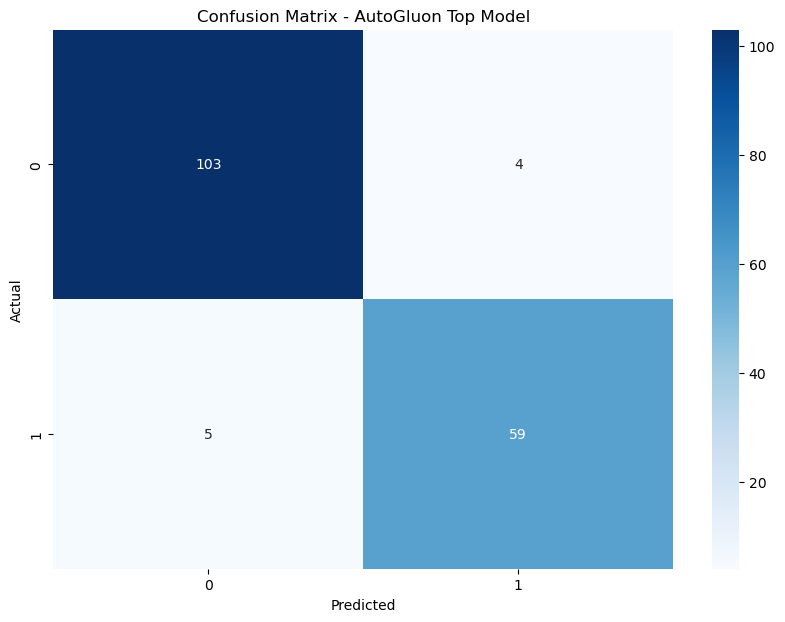


Model Leaderboard:
                  model  score_val eval_metric  pred_time_val  fit_time  \
0            LightGBMXT   0.970874    accuracy       0.000599  0.188453   
1              CatBoost   0.970874    accuracy       0.000665  0.221987   
2         LightGBMLarge   0.970874    accuracy       0.000729  0.271990   
3              LightGBM   0.970874    accuracy       0.000852  0.239141   
4               XGBoost   0.970874    accuracy       0.002204  0.094589   
5        NeuralNetTorch   0.970874    accuracy       0.007528  0.988652   
6       NeuralNetFastAI   0.970874    accuracy       0.008187  0.339348   
7        ExtraTreesEntr   0.970874    accuracy       0.050446  0.621226   
8        ExtraTreesGini   0.970874    accuracy       0.054082  0.619937   
9      RandomForestEntr   0.970874    accuracy       0.054193  0.632458   
10     RandomForestGini   0.970874    accuracy       0.054364  0.695877   
11  WeightedEnsemble_L2   0.970874    accuracy       0.054630  0.738880   
12   

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor

# Load the data
data = pd.read_csv('raw_data/Data.csv')

# Separate features and target
X = data.iloc[:, 1:-1]  # Exclude the first column (ID) and the last column (target)
y = data.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# AutoGluon
print("Training AutoGluon model...")
train_data = pd.concat([X_train, y_train], axis=1)
predictor = TabularPredictor(label=y.name, path='autogluon_model').fit(train_data)
ag_y_pred = predictor.predict(X_test)

print("AutoGluon Results:")
print(f"Accuracy: {accuracy_score(y_test, ag_y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, ag_y_pred))

plot_confusion_matrix(y_test, ag_y_pred, 'Confusion Matrix - AutoGluon Top Model')

# Get and display leaderboard
leaderboard = predictor.leaderboard()
print("\nModel Leaderboard:")
print(leaderboard)

# Save leaderboard to CSV
leaderboard.to_csv('outputs/autogluon_leaderboard.csv', index=False)
print("\nLeaderboard saved to outputs/autogluon_leaderboard.csv")

## Tpot

Training TPOT model...
                                                                             
Generation 1 - Current best internal CV score: 0.976546735198934
                                                                             
Generation 2 - Current best internal CV score: 0.976546735198934
                                                                             
Generation 3 - Current best internal CV score: 0.980449267085475
                                                                              
Generation 4 - Current best internal CV score: 0.980449267085475
                                                                              
Generation 5 - Current best internal CV score: 0.980449267085475
                                                                              
Best pipeline: ExtraTreesClassifier(ZeroCount(input_matrix), bootstrap=True, criterion=entropy, max_features=0.4, min_samples_leaf=15, min_samples_split=17, n_estimators=100)

TPOT 

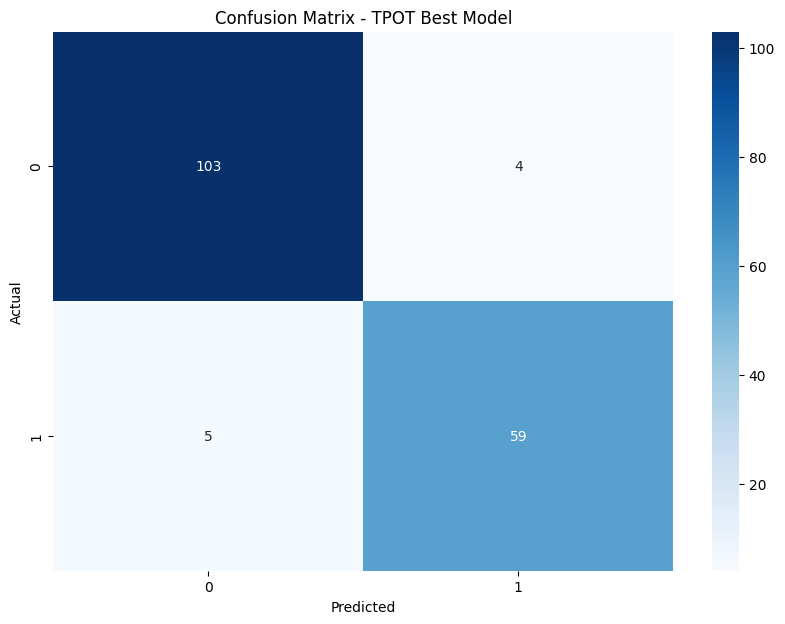


TPOT pipeline saved to tpot_breast_cancer_pipeline.py
TPOT confusion matrix saved to outputs/tpot_confusion_matrix.png


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tpot import TPOTClassifier
import os

# Load the data
data = pd.read_csv('raw_data/Data.csv')

# Separate features and target
X = data.iloc[:, 1:-1]  # Exclude the first column (ID) and the last column (target)
y = data.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Function to plot and save confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    # Create outputs directory if it doesn't exist
    if not os.path.exists('outputs'):
        os.makedirs('outputs')
    
    # Save the plot
    plt.savefig('outputs/tpot_confusion_matrix.png')
    
    # Display the plot
    plt.show()

# TPOT
print("Training TPOT model...")
tpot = TPOTClassifier(generations=5, population_size=20, cv=5, random_state=42, verbosity=2)
tpot.fit(X_train, y_train)
tpot_y_pred = tpot.predict(X_test)

print("\nTPOT Results:")
print(f"Accuracy: {accuracy_score(y_test, tpot_y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, tpot_y_pred))

plot_confusion_matrix(y_test, tpot_y_pred, 'Confusion Matrix - TPOT Best Model')

# Save TPOT pipeline
tpot.export('tpot_breast_cancer_pipeline.py')
print("\nTPOT pipeline saved to tpot_breast_cancer_pipeline.py")
print("TPOT confusion matrix saved to outputs/tpot_confusion_matrix.png")

## Comparing all models to AutoML

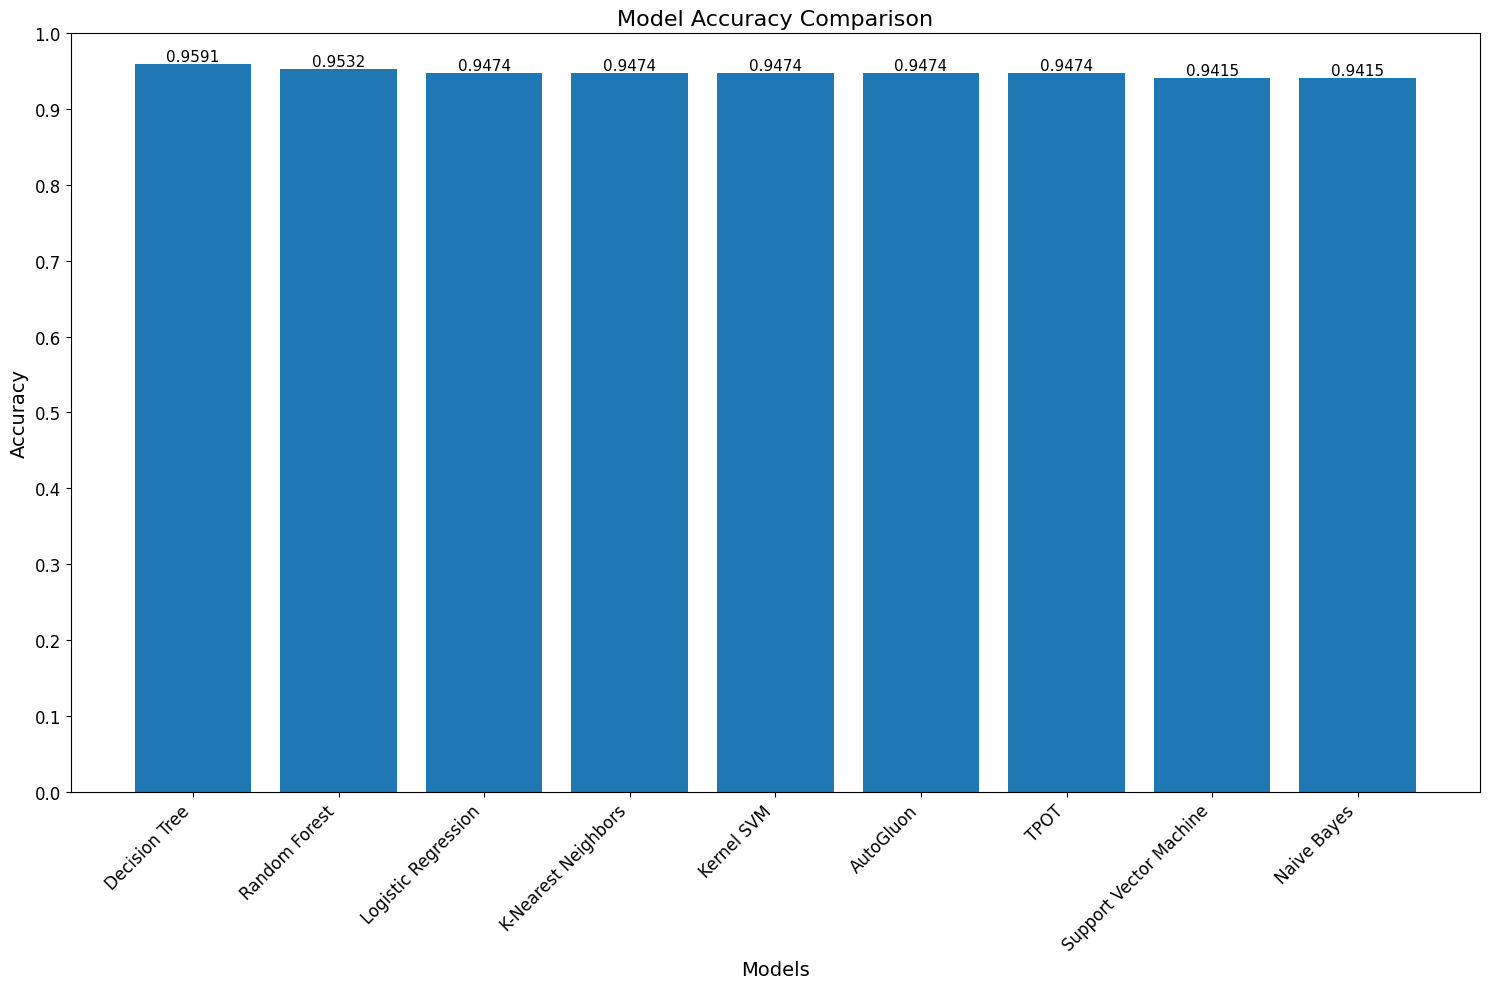

In [4]:
# Combine all results
results = {
    'Logistic Regression': 0.9474,
    'K-Nearest Neighbors': 0.9474,
    'Support Vector Machine': 0.9415,
    'Kernel SVM': 0.9474,
    'Naive Bayes': 0.9415,
    'Decision Tree': 0.9591,
    'Random Forest': 0.9532,
    'AutoGluon': 0.9474,
    'TPOT': 0.9474
}

# Sort results by accuracy
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))

# Plot accuracy comparison with values in bars
plt.figure(figsize=(15, 10))
bars = plt.bar(sorted_results.keys(), sorted_results.values())
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set y-axis to start from 0 and end at 1
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)  # Set y-ticks from 0 to 1 with 0.1 intervals

# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('outputs/model_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()